In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers_file = "Customers.csv"
products_file = "Products.csv"
transactions_file = "Transactions.csv"

In [7]:
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

# Data inspection

In [79]:
def inspect_data(df, name):
    print(f"\n--- {name} ---")
    print(f"Shape: {df.shape}")
    print("\nColumns:")
    print(df.columns)
    print("\nInfo:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    print("\nPreview:")
    print(df.head())

### customers data

In [35]:
inspect_data(customers_df, "Customers")


--- Customers ---
Shape: (200, 4)

Columns:
Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Summary Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Preview:
  CustomerID        C

### products data

In [37]:
inspect_data(products_df, "Products")


--- Products ---
Shape: (100, 4)

Columns:
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Summary Statistics:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN 

### transactions data

In [39]:
inspect_data(transactions_df, "Transactions")


--- Transactions ---
Shape: (1000, 7)

Columns:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Summary Statistics:
       TransactionID Cus

## cleaning data

In [41]:
def remove_duplicates(df, name):
    before = len(df)
    df.drop_duplicates(inplace=True)
    after = len(df)
    print(f"Removed {before - after} duplicate rows from {name}.")

remove_duplicates(customers_df, "Customers")
remove_duplicates(products_df, "Products")
remove_duplicates(transactions_df, "Transactions")

Removed 0 duplicate rows from Customers.
Removed 0 duplicate rows from Products.
Removed 0 duplicate rows from Transactions.


## merging data 

In [19]:
transactions_customers = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

In [21]:
merged_data = pd.merge(transactions_customers, products_df, on='ProductID', how='inner')

In [43]:
merged_data.drop_duplicates(inplace=True)
merged_data.dropna(inplace=True)

In [45]:
print("\n--- Merged Dataset ---")
print(merged_data.info())
print(merged_data.describe())


--- Merged Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   object        
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
 13  Month            1000 non-null   period[M]     
dtypes: datetime64[ns]

# EDA and visualization

## Customer Analysis: Region Distribution

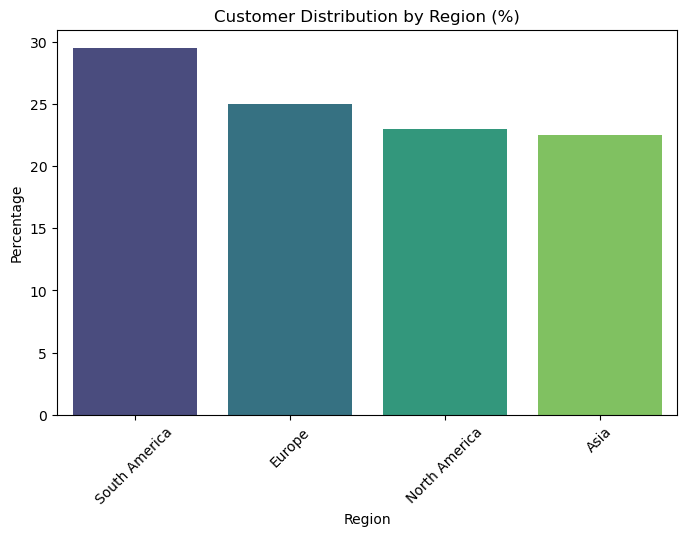

In [49]:
plt.figure(figsize=(8, 5))
region_counts = customers_df['Region'].value_counts(normalize=True) * 100
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette='viridis', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Customer Distribution by Region (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

## Product Analysis: Categories

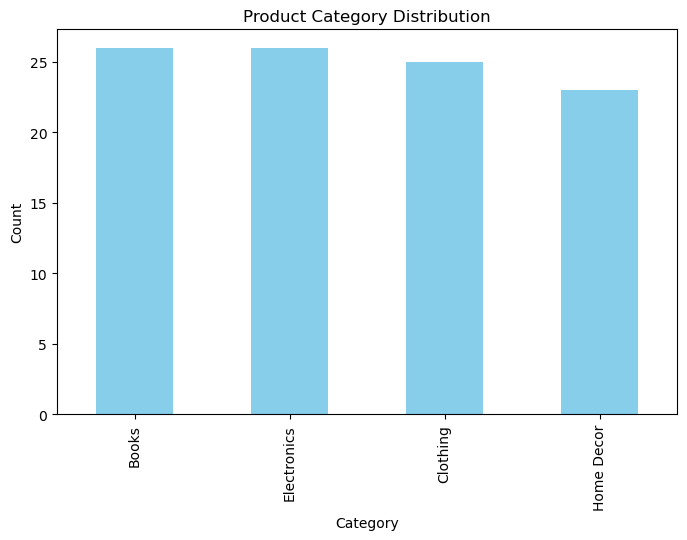

In [25]:
plt.figure(figsize=(8, 5))
products_df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Product Category Distribution')
plt.ylabel('Count')
plt.show()

## Transactions Analysis: Revenue Trends

In [51]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()

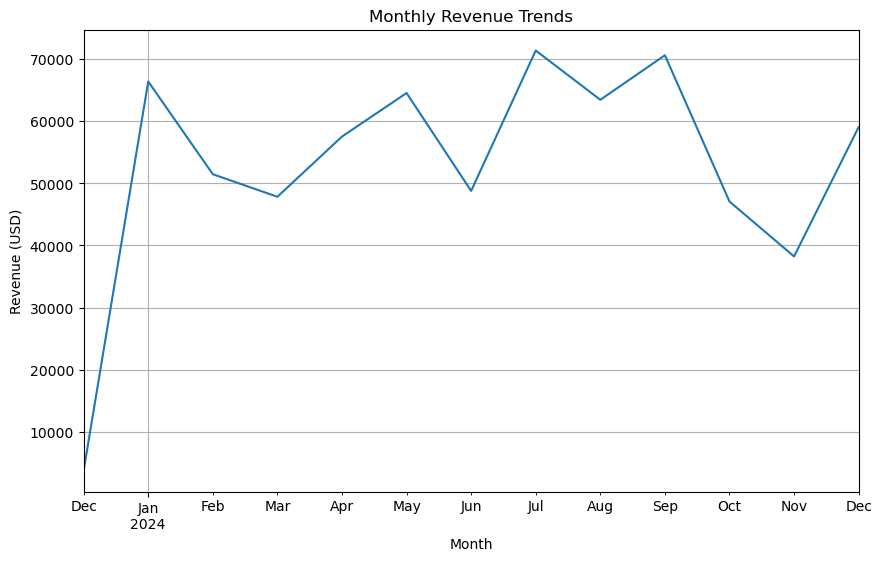

In [53]:
plt.figure(figsize=(10, 6))
monthly_revenue.plot()
plt.title('Monthly Revenue Trends')
plt.ylabel('Revenue (USD)')
plt.xlabel('Month')
plt.grid()
plt.show()

## High-Value Customers

In [57]:
high_value_threshold = merged_data['TotalValue'].quantile(0.95)
high_value_customers = merged_data.groupby('CustomerID')['TotalValue'].sum()
high_value_customers = high_value_customers[high_value_customers > high_value_threshold].sort_values(ascending=False)
print("\nHigh-Value Customers (Above 95th Percentile):")
print(high_value_customers)


High-Value Customers (Above 95th Percentile):
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
           ...   
C0002     1862.74
C0132     1851.26
C0029     1785.87
C0186     1761.64
C0010     1717.55
Name: TotalValue, Length: 169, dtype: float64


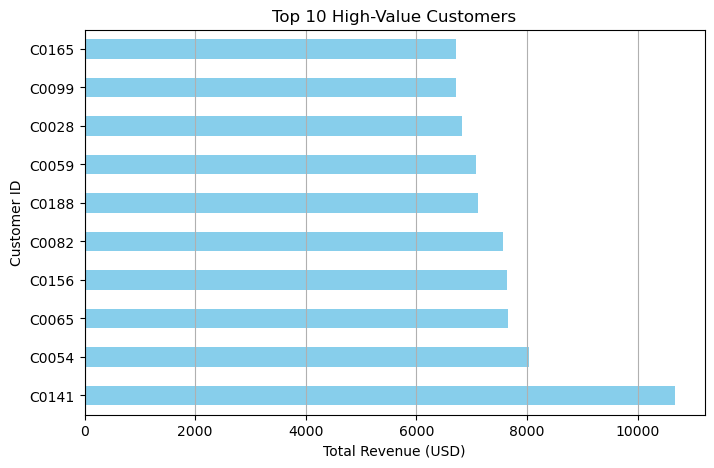

In [67]:
high_value_customers.head(10).plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Customer ID')
plt.grid(axis='x')
plt.show()

## Revenue Contribution by Region

In [59]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue Contribution by Region:")
print(region_revenue)


Revenue Contribution by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


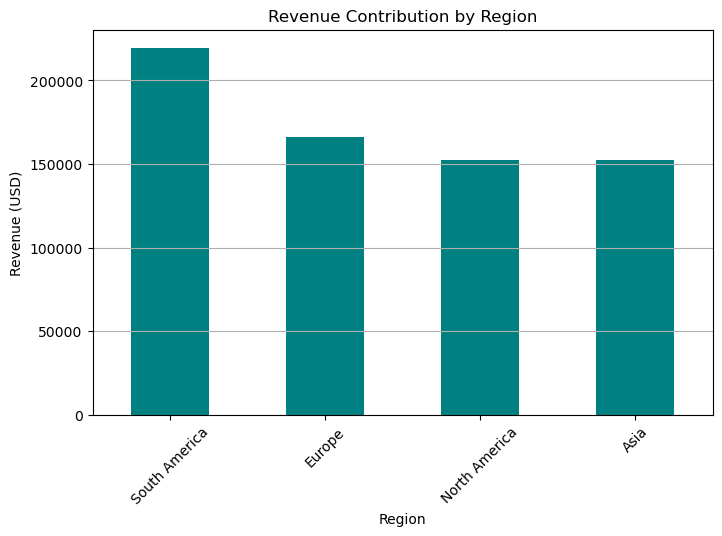

In [69]:
region_revenue.plot(kind='bar', figsize=(8, 5), color='teal')
plt.title('Revenue Contribution by Region')
plt.ylabel('Revenue (USD)')
plt.xlabel('Region')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

## Top Revenue-Generating Product Categories

In [61]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop Revenue-Generating Product Categories:")
print(category_revenue)


Top Revenue-Generating Product Categories:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


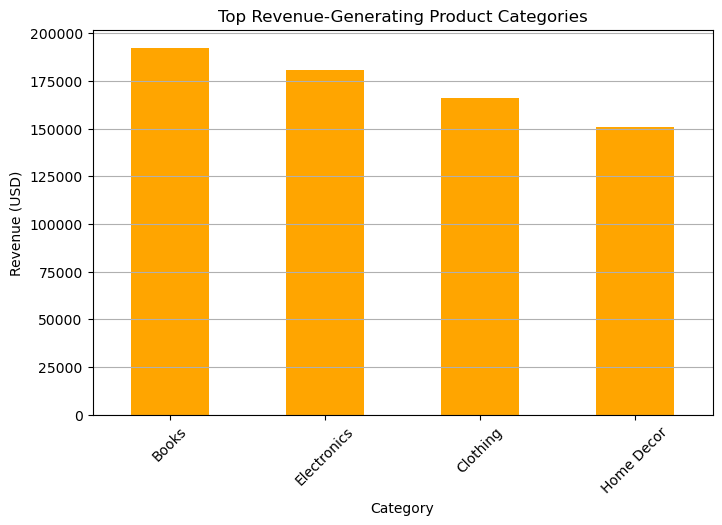

In [71]:
category_revenue.head(5).plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Top Revenue-Generating Product Categories')
plt.ylabel('Revenue (USD)')
plt.xlabel('Category')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

## Seasonal Trends in Revenue

In [63]:
monthly_revenue_diff = monthly_revenue.diff()
print("\nMonth-over-Month Revenue Change:")
print(monthly_revenue_diff)


Month-over-Month Revenue Change:
Month
2023-12         NaN
2024-01    62606.87
2024-02   -14917.12
2024-03    -3630.54
2024-04     9690.33
2024-05     7008.68
2024-06   -15756.56
2024-07    22595.21
2024-08    -7929.65
2024-09     7167.01
2024-10   -23540.53
2024-11    -8838.85
2024-12    20824.83
Freq: M, Name: TotalValue, dtype: float64


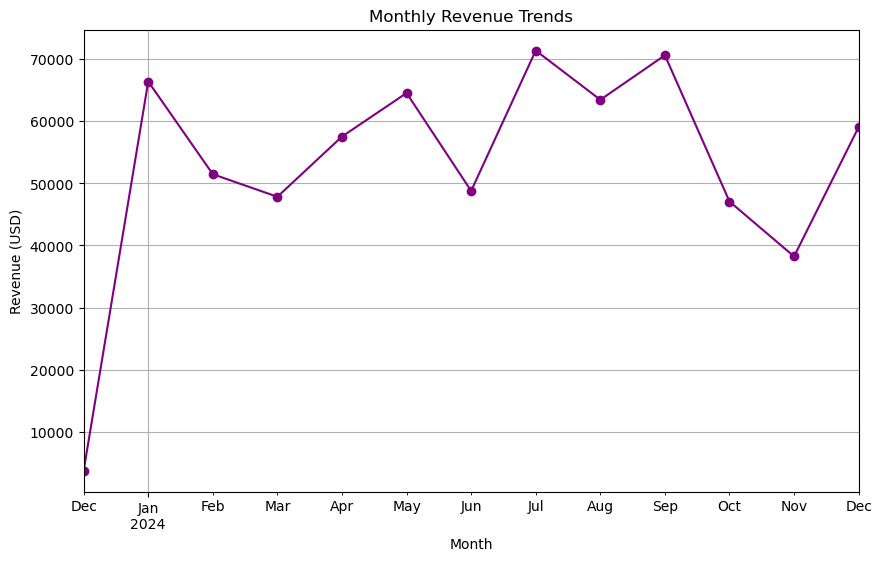

In [73]:
monthly_revenue.plot(kind='line', figsize=(10, 6), marker='o', color='purple')
plt.title('Monthly Revenue Trends')
plt.ylabel('Revenue (USD)')
plt.xlabel('Month')
plt.grid()
plt.show()

## Customer Signup Trends


Customer Signup Trends:
SignupMonth
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: CustomerID, dtype: int64


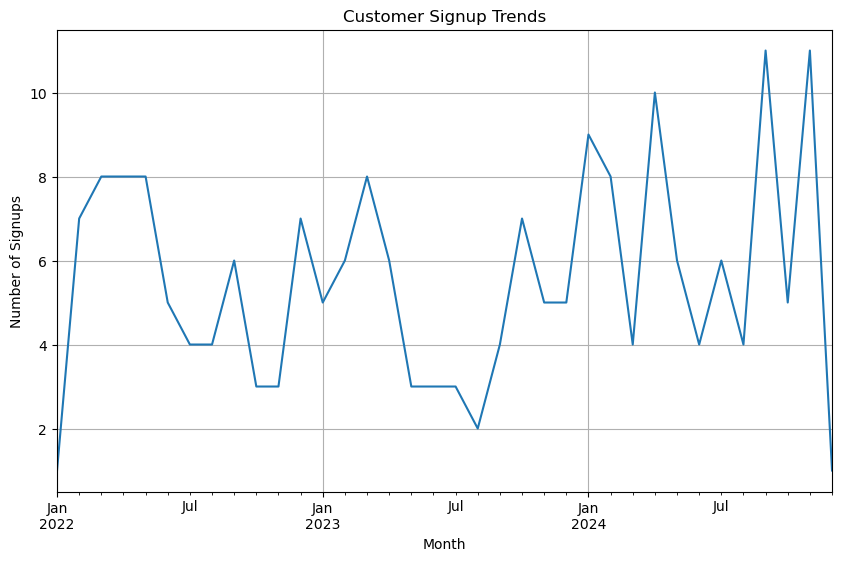

In [65]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
signup_trends = customers_df.groupby('SignupMonth')['CustomerID'].count()
print("\nCustomer Signup Trends:")
print(signup_trends)

plt.figure(figsize=(10, 6))
signup_trends.plot()
plt.title('Customer Signup Trends')
plt.ylabel('Number of Signups')
plt.xlabel('Month')
plt.grid()
plt.show()